In [26]:
import argparse
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tifffile
from PIL import Image

In [39]:
# set a path for a segmented image
segmented_images_path = pathlib.Path("../processed_data/C4-2/").resolve(strict=True)

In [42]:
# get the tiff files in the directory
segmented_images = list(segmented_images_path.glob("*.tiff"))

In [43]:
segmented_images[3]

PosixPath('/home/lippincm/Documents/GFF_3D_organoid_profiling_pipeline/1.segment_images/processed_data/C4-2/nuclei_masks.tiff')

In [50]:
# load the segmented image
segmented_image = tifffile.imread(segmented_images[3])
segmented_image.shape

(33, 1537, 1540)

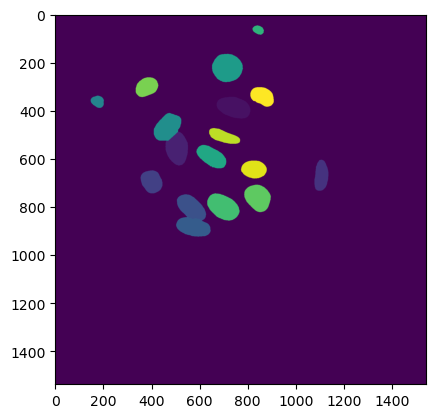

In [51]:
plt.imshow(segmented_image[5])

In [52]:
# get the labels in the image
labels = np.unique(segmented_image)
labels

array([  0,   4,   8,  13,  17,  22,  26,  31,  35,  40,  44,  49,  53,
        58,  62,  67,  71,  80,  85,  89,  93,  98, 102, 107, 111, 116,
       125, 129, 134, 138, 143, 147, 152, 161, 165, 170, 174, 178, 183,
       187, 192, 196, 201, 205, 210, 214, 219, 223, 228, 232, 237, 241,
       246, 250, 255], dtype=uint8)

[(5.3141493860383076, 386.92353180615544, 742.1053232627032)]

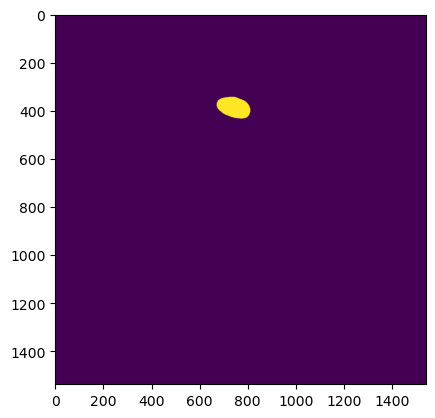

In [59]:
# drop all labels except the one of interest
segmented_image[segmented_image != 4] = 0
plt.imshow(segmented_image[5])
# get the mask x, y, z coordinates of the segmented image
from skimage.measure import regionprops

properties = regionprops(segmented_image)
centroids = [prop.centroid for prop in properties if prop.label == 4]
centroids